# 基于Fashion-MNIST数据集使用softmax回归 

In [2]:
%matplotlib inline 
#用于在ipynb中内嵌显示matplotlib绘制的图表，在输入单元格中显示
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()#用SVG显示图片，清晰度高

In [3]:
#通过框架中的内置函数获取数据集
trans = transforms.ToTensor()#预处理，定义了一个转换器，可以将PIL图像或者numpy数组转为张量，并自动将图像的像素值从[0,255]范围缩放到[0,1]范围。
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train= True,transform=trans,download=True)#下载训练数据集，下载得到的是pytorch张量。
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)#是测试集

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [6]:
len(mnist_test),len(mnist_train),mnist_train[0][0].shape#mnist数据集每个元素使一个元组，包含图像和对应的标签，[0][0]获取第一个元素的图像数据。

(10000, 60000, torch.Size([1, 28, 28]))

In [7]:
#定义函数，用于在数字标签索引及文本名称间进行转换
#输入标签索引，输出索引对应的文本名称
def get_fashion_mnist_labels(labels):
    """返回Fashion_MNIST数据集的文本标签"""#文档字符串，用于描述一个方法的功能和用法，可以通过__doc__属性访问
    text_labels = ['t-shirt','trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [10]:
#创建函数来可视化样本
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols*scale,num_rows*scale)
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'coat'}>, <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'ankle boot'}>], dtype=object)

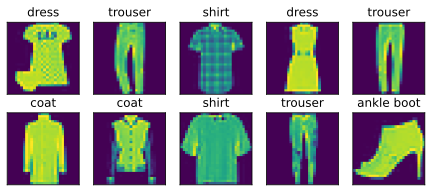

In [36]:
#虽然是迭代器，但是每次运行结果都一样的原因是，每次运行代码都在重新定义相同的迭代器
X,y = next(iter(data.DataLoader(mnist_train,batch_size=10)))#每18个为一组，y为18个标签列表，X为像素
show_images(X.reshape(10,28,28),2,5,titles= get_fashion_mnist_labels(y))#18指的是batchsize，18个样本2行9列排布

# it= iter(data.DataLoader(mnist_train,batch_size=10))
# X,y = next(it)这个语句单独运行多次，会有不同的结果

In [39]:
#使用内置数据迭代器
batch_size = 256
def get_dataloader_workers():
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [40]:
#查看读取所有数据所用时间
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f}sec'

'5.50sec'

In [ ]:
#定义一个函数用于获取F-MNIST的训练集和测试集的迭代器，能接受一个可选参数resize，来调整图像形状
def load_data_fashion_mnist(batch_size,resize=None):
    """下载F-MNIST数据集，然后将其加载到内存中，返回的是数据迭代器"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))#每个变换会依次对数据进行操作，所以插入的顺序是非常重要的
    trans = transforms.Compose(trans)#将多个变换操作组合成一个单一的变换操作。
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test,batch_size,shuffle= True,num_workers=get_dataloader_workers()))
#对于trans 在compose前的多个操作顺序，一般为：先调整图像大小（resize)，后转换为张量，最后进行归一化操作。

In [ ]:
train_iter, test_iter = load_data_fashion_mnist(32,resize = 64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break